# Missing Values Part 1
In here we will see `how to get the rows containing missing values` and deal with `numeric columns` containing missing values.

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Getting the missing values

In [3]:
df.isnull().head()
#Returns the boolean value if the cell contains null value

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False


In [4]:
df.notnull().head()
#returns the boolean value if the cell doesn't contain null value

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,True,True,True,True,True,True,True,True,True,True,False,True
1,True,True,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,False,True
3,True,True,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,False,True


In [5]:
df.isnull().sum()
#counts number of missing values in each column

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
#this allows us to see the rows of missing values in column 'Embarked'
df[df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [7]:
#Doing the same for the 'Age'
df[df['Age'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


#### Dealing with missing values

In [8]:
df.shape

(891, 12)

In [9]:
#drop rows if any of the columns have a missing values
df.dropna(how='any').shape
#it doesnt drop the rows but gives the shape we do it
#we can't drop them cause then we will end up loosing much of our data

(183, 12)

In [10]:
#df.dropna(how='any',inplace=True)
#for dropping the rows containing missing values in any of their columns

In [11]:
#drop row if all of the columns are missing
df.dropna(how='all').shape
#it also returns the shape, doesn't drop it
#from the output it seems that there are no rows with all the missing values from columns

(891, 12)

In [12]:
#df.dropna(how='all', inplace=True)
#drops rows whose all columns contain missing values

In [13]:
#drop row if either Age or Cabin are missing
df.dropna(subset=['Age','Cabin'],how='any').shape
#returns shape
#df.dropna(subset=['Age','Cabin'],how='any', inplace=True) for dropping

(185, 12)

In [14]:
#drop row if both age and cabin are missing
df.dropna(subset=['Age','Cabin'],how='all').shape
#df.dropna(subset=['Age','Cabin'],how='all', inplace=True) for dropping

(733, 12)

In [15]:
import numpy as np
df['cabin_null']=np.where(df['Cabin'].isnull(),1,0)
#adds new column indicating missing values as 1 (for True) and 0 (for False)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cabin_null
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [16]:
#find the percentage of null values
df['cabin_null'].mean()
#77% values are missing from the 'Cabin' column

0.7710437710437711

#### Median Imputation
Filling the missing values with mean or median.

In [17]:
#Loading the data with only required columns
df=pd.read_csv('titanic.csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [18]:
#percentage of missing values
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [19]:
#Null values in 'Age' column
df[df['Age'].isnull()]

,Survived,Age,Fare
5,0,NaN,8.4583
17,1,NaN,13.0000
19,1,NaN,7.2250
26,0,NaN,7.2250
28,1,NaN,7.8792
...,...,...,...
859,0,NaN,7.2292
863,0,NaN,69.5500
868,0,NaN,9.5000
878,0,NaN,7.8958


In [20]:
#defining a function that creates new column
#and fills the missing values with the help of median of that column
def impute_nan(df,variable,median):
    df[variable+"_median"]=df[variable].fillna(median)

In [21]:
#Assigning 'median' the median value of 'Age' column
median=df.Age.median()
median

28.0

In [22]:
#using the function for 'Age' column
impute_nan(df,'Age',median)
df.head()
#a new column will be created where,
#missing values will be replaced by 28.0
df[5:18]
#you can see that in 'Age_median' column NaN values are replaced with the median

,Survived,Age,Fare,Age_median
5,0,NaN,8.4583,28.0
6,0,54.0,51.8625,54.0
7,0,2.0,21.0750,2.0
8,1,27.0,11.1333,27.0
9,1,14.0,30.0708,14.0
10,1,4.0,16.7000,4.0
11,1,58.0,26.5500,58.0
12,0,20.0,8.0500,20.0
13,0,39.0,31.2750,39.0
14,0,14.0,7.8542,14.0


In [23]:
print(df['Age'].std())
print(df['Age_median'].std())
#gives the std deviation of the columns

14.526497332334044
13.019696550973194


#### KDE Plot of the `Age` and `Age_median`
Gives distribution of the Age and Age_median column.

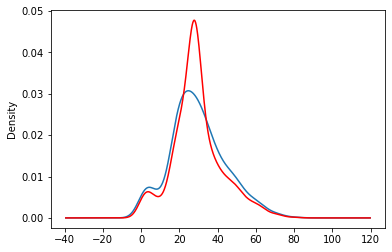

In [24]:
import matplotlib.pyplot as plt
fig=plt.figure()
ax=fig.add_subplot(111)
df['Age'].plot(kind='kde',ax=ax)
df.Age_median.plot(kind='kde',ax=ax,color='red');
#you can observe the peak in the curve for 'Age_median'
#it happens so since the null values are replaced with median

#### Mean Imputation

In [25]:
#defining a function that creates new column
#and fills the missing values with the help of mean of that column
def impute_nan(df,variable,mean):
    df[variable+"_mean"]=df[variable].fillna(mean)

In [26]:
#assing value to the mean
mean=df.Age.mean()
mean

29.69911764705882

In [27]:
#using the function defined above for 'Age'
impute_nan(df,'Age',mean)
df[5:18]

,Survived,Age,Fare,Age_median,Age_mean
5,0,NaN,8.4583,28.0,29.699118
6,0,54.0,51.8625,54.0,54.000000
7,0,2.0,21.0750,2.0,2.000000
8,1,27.0,11.1333,27.0,27.000000
9,1,14.0,30.0708,14.0,14.000000
10,1,4.0,16.7000,4.0,4.000000
11,1,58.0,26.5500,58.0,58.000000
12,0,20.0,8.0500,20.0,20.000000
13,0,39.0,31.2750,39.0,39.000000
14,0,14.0,7.8542,14.0,14.000000


In [28]:
#Standard deviation of the columns
print(df['Age'].std())
print(df['Age_mean'].std())

14.526497332334044
13.002015226002884


#### KDE Plot of the `Age` and `Age_mean`
Gives distribution of the Age and Age_mean column.

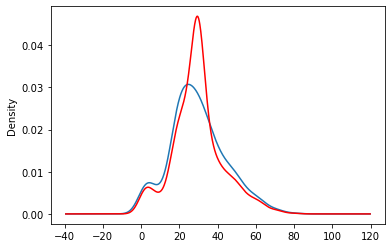

In [29]:
import matplotlib.pyplot as plt
fig=plt.figure()
ax=fig.add_subplot(111)
df['Age'].plot(kind='kde',ax=ax)
df.Age_mean.plot(kind='kde',ax=ax,color='red');

The End